In [24]:
# implementing simple chatbot using langgraph
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

# reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [25]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

In [26]:
import os 
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
grok_api_key = os.getenv("GROQ_API_KEY")

In [27]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model="openai/gpt-oss-20b", api_key=grok_api_key)
llm_groq.invoke("hello").content

'Hello! 👋 How can I help you today?'

In [28]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

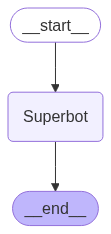

In [29]:
graph = StateGraph(State)
graph.add_node("Superbot", superbot)

graph.add_edge(START, "Superbot")
graph.add_edge("Superbot", END)

graph_builder = graph.compile()

# display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [33]:
## invodation
graph_builder.invoke({"messages": "Hi, My name is pavi and I love Cricket"})

{'messages': [HumanMessage(content='Hi, My name is pavi and I love Cricket', additional_kwargs={}, response_metadata={}, id='e7603512-ac18-4c5e-81f7-52904f256d3c'),
  AIMessage(content='Hey Pavi! 👋🏼\n\nNice to meet you—cricket fan, huh? That’s awesome! Whether you’re into the fast-paced action of the IPL, the classic charm of Test matches, or just love smashing the ball, I’m here to chat about any and all cricket topics.  \n\nWhat’s on your mind today? ⚡️\n\n- Do you follow a particular team or league?  \n- Want to dive into stats, recent matches, or historical trivia?  \n- Need tips on batting or bowling?  \n\nJust let me know, and we’ll get right into it! 🏏', additional_kwargs={'reasoning_content': "We need to respond warmly. They introduced themselves. Also mention how we can help. Let's ask what they'd like to discuss."}, response_metadata={'token_usage': {'completion_tokens': 159, 'prompt_tokens': 82, 'total_tokens': 241, 'completion_time': 0.132605818, 'prompt_time': 0.007701263,

In [38]:
## Streaming the responses
for event in graph_builder.stream({"messages": "hello my name is pavithiran"}):
    print(event)

{'Superbot': {'messages': [AIMessage(content='Hello Pavithiran! 👋 How can I help you today?', additional_kwargs={'reasoning_content': 'We need to respond. The user says "hello my name is pavithiran". We should greet them. No constraints. Should we ask what they need? Just a friendly reply.'}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 78, 'total_tokens': 139, 'completion_time': 0.050654441, 'prompt_time': 0.005507795, 'queue_time': 0.046111473, 'total_time': 0.056162236}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_fc8da5621e', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--39eb8a2d-0c45-4aa4-b030-ebd5db523e88-0', usage_metadata={'input_tokens': 78, 'output_tokens': 61, 'total_tokens': 139})]}}


In [39]:
for event in graph_builder.stream({"messages": "hello my name is pavithiran"}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='hello my name is pavithiran', additional_kwargs={}, response_metadata={}, id='e1e07b31-f213-46bc-99fe-c5bd6530d8e6')]}
{'messages': [HumanMessage(content='hello my name is pavithiran', additional_kwargs={}, response_metadata={}, id='e1e07b31-f213-46bc-99fe-c5bd6530d8e6'), AIMessage(content='Hello Pavithiran! 👋 How can I assist you today?', additional_kwargs={'reasoning_content': 'The user says "hello my name is pavithiran". We should respond politely, perhaps ask how we can help. There\'s no conflict. Just greet.'}, response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 78, 'total_tokens': 133, 'completion_time': 0.045633128, 'prompt_time': 0.005552465, 'queue_time': 0.046628815, 'total_time': 0.051185593}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_fc8da5621e', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--ca0d91a6-ba57-4d5f-871f-86d1fabc6deb-0', usage_metadata={'input_toke